# `geopandas` 

GeoPandas is a Pyton library that extends the capabilities of the pandas library to work with spatial data.

## Reproducible file paths

Let's import the packages we'll be working with:


In [3]:
import os 
import geopandas as gpd
import matplotlib.pyplot as plt

In [12]:
fp= os.path.join('data', 'gbif_sus-scrofa_california', 'gbif_sus_scrofa_california.shp')
fp

'data/gbif_sus-scrofa_california/gbif_sus_scrofa_california.shp'

We can use this file path to import the shapefile using `geopandas.read_file()` function:

In [13]:
pigs= gpd.read_file(fp)
pigs

,gbifID,species,state,individual,day,month,year,inst,collection,catalogNum,identified,geometry
0,899953814,Sus scrofa,California,NaN,22.0,3.0,2014.0,iNaturalist,Observations,581956,edwardrooks,POINT (-121.53812 37.08846)
1,899951348,Sus scrofa,California,NaN,9.0,6.0,2007.0,iNaturalist,Observations,576047,Bruce Freeman,POINT (-120.54942 35.47354)
2,896560733,Sus scrofa,California,NaN,20.0,12.0,1937.0,MVZ,Hild,MVZ:Hild:195,"Museum of Vertebrate Zoology, University of Ca...",POINT (-122.27063 37.87610)
3,896559958,Sus scrofa,California,NaN,1.0,4.0,1969.0,MVZ,Hild,MVZ:Hild:1213,"Museum of Vertebrate Zoology, University of Ca...",POINT (-121.82297 38.44543)
4,896559722,Sus scrofa,California,NaN,1.0,1.0,1961.0,MVZ,Hild,MVZ:Hild:1004,"Museum of Vertebrate Zoology, University of Ca...",POINT (-121.74559 38.54882)
...,...,...,...,...,...,...,...,...,...,...,...,...
1041,1024216143,Sus scrofa,California,NaN,24.0,8.0,2014.0,iNaturalist,Observations,848609,sea-kangaroo,POINT (-121.71341 37.34271)
1042,1024215805,Sus scrofa,California,NaN,24.0,8.0,2014.0,iNaturalist,Observations,847708,Donna Pomeroy,POINT (-121.71871 37.34467)
1043,1024215159,Sus scrofa,California,NaN,23.0,8.0,2014.0,iNaturalist,Observations,845949,Alyssa Semerdjian,POINT (-120.18419 35.39745)
1044,1019052419,Sus scrofa,California,2.0,18.0,9.0,1998.0,"Borror Laboratory of Bioacoustics, Ohio State ...",Recordings,BLB30714,None,POINT (-119.55190 34.04810)


In [18]:
fp_ca= os.path.join('data', 'california_state_boundary', 'ca_state_boundary.shp')
fp_ca

'data/california_state_boundary/ca_state_boundary.shp'

In [19]:
ca_boundary= gpd.read_file(fp_ca)
ca_boundary

,REGION,DIVISION,STATEFP,STATENS,GEOID,STUSPS,NAME,LSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,4,9,06,01779778,06,CA,California,00,G4000,A,403501101370,20466718403,+37.1551773,-119.5434183,"MULTIPOLYGON (((-119.63473 33.26545, -119.6363..."


## GeoSeries and GeoDataFrames

`gpd.GeoDataFrame`= `pandas.Dataframe` + geometry column

At the end of the `pandas.Series` on the normal data frame is a geometries column (`geopandas.geoseries.GeoSeries`) tacked on to the end

In [20]:
# Check what kind of object pigs is
print(type(pigs))

# Check what kind of object is in the geometry column
print(type(pigs.geometry))

# Check what kind of object is in the species column
print(type(pigs.species))

<class 'geopandas.geodataframe.GeoDataFrame'>
<class 'geopandas.geoseries.GeoSeries'>
<class 'pandas.core.series.Series'>


In [21]:
pigs.dtypes

gbifID           int64
species         object
state           object
individual     float64
day            float64
month          float64
year           float64
inst            object
collection      object
catalogNum      object
identified      object
geometry      geometry
dtype: object

## Check-in 
what is the geometry type of the single feature in the CA state boundary? Why does it make sense to have this kind of geometry?


In [25]:
# Using .geom_type to find geometry info
ca_boundary.geom_type

0    MultiPolygon
dtype: object

In [23]:
print(type(ca_boundary.geometry))

<class 'geopandas.geoseries.GeoSeries'>


## CRS and extend

CRS= coordinate reference system (one of the most important base components of visualizing geospatial data)

The CRS is the instruction manual for how we locate each spatial feature of our data frame on the surface of the earth

In [26]:
# Access the CRS of the GeoDataFrame
pigs.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [27]:
# Get more info about CRS
print('ellipsoid: ', pigs.crs.ellipsoid)
print('datum: ', pigs.crs.datum)
print('is geographic? ', pigs.crs.is_geographic)
print('is projected? ', pigs.crs.is_projected)

ellipsoid:  WGS 84
datum:  World Geodetic System 1984 ensemble
is geographic?  True
is projected?  False


## What is the extent?

Extent = bounding box (essentially lol)

In [28]:
# Obtain the geographic extent of the geo-dataframe
pigs.total_bounds

array([-124.29448 ,   32.593433, -115.4356  ,   40.934296])

## Check-in:

Print the CRS and extent for the CA boundary. Are both geodataframes in the same CRS?


In [30]:
ca_boundary.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [31]:
ca_boundary.total_bounds

array([-124.48201686,   32.52883674, -114.13122248,   42.00950827])

In [32]:
pigs.crs == ca_boundary.crs

True

## Data wrangling:

Since `geopandas` is built on top of `pandas`, we may use everything we have learned about `pandas.DataFrames` to wrangle geo-dataframes.

Example:

We only want to use recent data for wild pig observations.

In [34]:
# Examine pig observations by year
pigs.year.value_counts().sort_index()


1818.0     31
1910.0      1
1925.0      1
1927.0      4
1929.0      3
         ... 
2019.0    101
2020.0    159
2021.0    164
2022.0    185
2023.0     98
Name: year, Length: 61, dtype: int64

In [36]:
# Select data from 2020 onwards
pigs_recent= pigs[pigs.year>=2020]

# Check the length or original data frame versus new one
print('Total length of observations', len(pigs))

print('Number of observations since 2020', len(pigs_recent))

Total length of observations 1046
Number of observations since 2020 606


<AxesSubplot:>

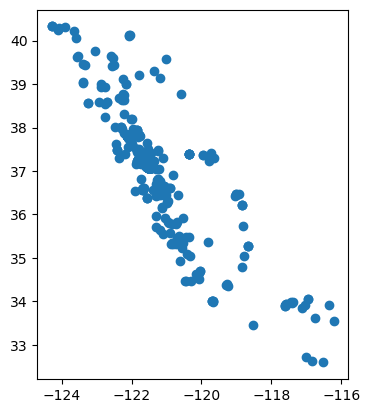

In [37]:
pigs_recent.plot()

## matplotlib
Has both x and y axis for both plots, and the figure boundaries are separate from the axes boundaries for each plot

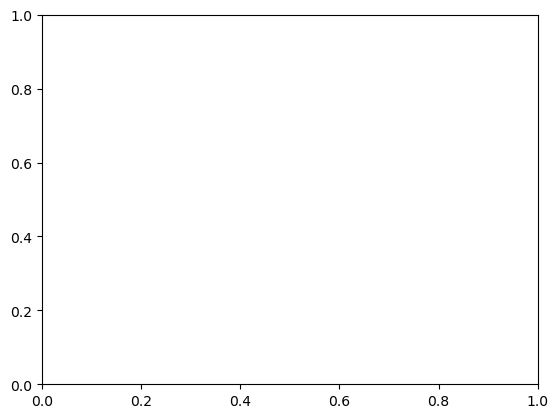

In [38]:
# Initialize an empty figure (fig) and axes (ax)
fig, ax= plt.subplots()

plt.show()

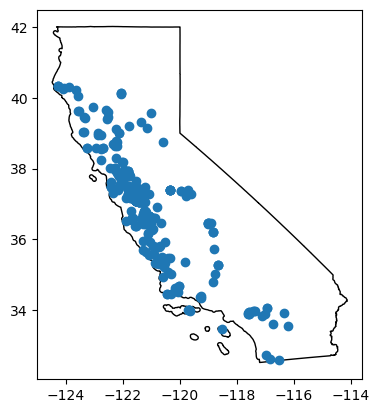

In [40]:
## Add multiple layers to our plot
fig, ax= plt.subplots()

# Add california boundary
ca_boundary.plot(ax=ax,
                color= 'none',
                edgecolor= 'black')

# Add pigs data from 2020
pigs_recent.plot(ax=ax)

plt.show()